# Genre Classification of TV Shows



TVmaze is a free online television information database that provides users with detailed information about TV shows, their episodes, and their schedules. The website was launched in 2005 and has since grown to become one of the most comprehensive TV databases available.

### Genre


Possibilities are:

- Drama

- Comedy

- Romance

- Crime

- Action

- Adventure

- Anime

- Mystery

- History

- Children

- Thriller

- Fantasy

- Science-Fiction

- Family

- Food

- Music

- Travel

- Sports

- Nature

In [1]:
assigned_genre = 'Thriller'

To make sure everyone has unique data (even if you share a genre), we will use a random state key. 
I am just using my student ID number

In [ ]:

#student ID used
random_state_key = 46167374

### Data

You will find a SQLite database (called `tvmaze.sqlite`)  This is the data you will work from. Copy it into the same directory where you have put this jupyter notebook.

The following cell will create a connection

In [3]:
import sqlite3

# Connect to the SQLite database
connection = sqlite3.connect("tvmaze.sqlite")

### Character Data

In a few places, you will be asked to run queries on the names of characters.

The following cell creates a dataframe called `characters_df` using this query:

`select tvmaze_id, tvmaze_character_id, name from tvmaze_casting join tvmaze_characters using (tvmaze_character_id);`

In [4]:
import pandas as pd

# Define the SQL query
sql_query = """
select tvmaze_id, tvmaze_character_id, name
from tvmaze_casting join tvmaze_characters
using (tvmaze_character_id);
"""

# Read the data into a pandas dataframe
characters_df = pd.read_sql_query(sql_query, connection)

If you aren't familiar with pandas, and just want to use raw `numpy`, you can use the `characters` array
created in the next cell.

In [5]:
characters = characters_df.to_numpy()
characters.shape, characters.dtype

((209697, 3), dtype('O'))

And to make it a little easier, here are the character names extracted as a list.

In [6]:
character_names = list(characters[:,2])
character_names

['You Yuan Le',
 'Lin An An',
 'Ren Hao',
 'Ye Luo Sha',
 'Sung Yi Gyum',
 'Hong Da In',
 'Sung Yi Bum',
 'Park Chun Sam',
 'Mio Meguro',
 'Iwa Yotsuya',
 'Ryo Sakai',
 'Utako Warabe',
 'Miyuki Yamanaka',
 'Sara Yanagi',
 'Yuzuru Minaoka',
 'Hibito Harashima',
 'Hiyo Numata',
 'Sgt. Bill Parkin (Sarge)',
 'PC Eric Warren (Token)',
 'PC John Barrett (Thug)',
 'PC Gill Copson (Dippy)',
 'PC Roger Tennant (Flub)',
 'PC Lionel Adams (Oz)',
 'PC Susan Li (Bruce)',
 'PC Ian Macrae (Jock)',
 'PC Wayne Cheetham (Bog)',
 'Supt. Hallsworth',
 'DI Overton',
 'DCI Chivers',
 'PC Goole',
 'DC Stoppard',
 'Tracy Collins',
 'Linda Eide',
 'Robert Kingsford',
 'Dr. Christine Fletcher',
 'Dr. Mike Gregson',
 'Dr. Louise Macken',
 'Dr. Stuart Phelan',
 'Dr. David Scobie',
 'Cathy Jordan',
 'Judy Enshaw',
 'Terry Harker',
 'Yvonne Silver',
 'Dr. Andrew Argyle',
 'Dr. Kate Brady',
 'Samantha Docherty',
 'Jack Turner',
 'Dr. Raz Amin',
 'Dr. Ruth Cole',
 'Dr. Danny Barton',
 'Poppy Jonston',
 'Dr. Jeffrey 

In [7]:
data_size = 1000

### Show data

The following cells create:

- A dataframe called `show_df` (if you are familiar with pandas)

- A numpy array called `shownames` (the names of the shows to work with)

- A numpy array called `descriptions` (which has the show descriptions)

- A numpy array called `in_genre` (whether this show is in your target genre or not)

- A numpy array called `tvmaze_ids` (the ID numbers of the shows).

In [8]:
out_of_genre_sql_query = f"""
select tvmaze_id, showname, description, 0.0 as in_genre from tvmaze
where tvmaze_id not in (select tvmaze_id from tvmaze_genre where genre = '{assigned_genre}')
      and description is not null
      and length(description) > 10"""

in_genre_sql_query = f"""select tvmaze_id, showname, description, 1.0 as in_genre from tvmaze
where tvmaze_id in (select tvmaze_id from tvmaze_genre where genre = '{assigned_genre}')
      and description is not null
      and length(description) > 10
"""

out_of_genre_df = pd.read_sql(out_of_genre_sql_query, connection)
in_genre_df = pd.read_sql(in_genre_sql_query, connection)
show_df = pd.concat([out_of_genre_df.sample(data_size, random_state=random_state_key), 
                     in_genre_df.sample(data_size, random_state=random_state_key)])
show_df

,tvmaze_id,showname,description,in_genre
13567,16015,Geer & Goor: Zoeken een Hobby!,<p>Geer &amp; Goor will be there again for lon...,0.0
12482,14655,Islands of the Future,<p>Amid rising oil and gas prices and dwindlin...,0.0
11216,13142,Batfink,<p><b>Batfink</b> was a spoof of the popular D...,0.0
17592,20957,Go! Mrs. Go!,<p>Go Bong Shil is separated from her husband ...,0.0
17319,20637,World Series,<p>The <b>World Series</b> is the annual champ...,0.0
...,...,...,...,...
192,3503,Spy,<p>The fictional story begins after the execut...,1.0
1648,52927,Times,<p>A time warping political mystery drama that...,1.0
1278,45950,Liars Club,<p><b>Liars Club</b> is a show about a woman w...,1.0
364,11824,Requiem,<p>What if your parent died and you suddenly d...,1.0


In [9]:
show_ids = show_df.tvmaze_id.to_numpy()
descriptions = show_df.description.to_numpy()
in_genre = show_df.in_genre.to_numpy()
shownames = show_df.showname.to_numpy()

## Task 1 , performing regular expressions - Regular expressions

### 1.1 

We all know that James Bond gets his gadgets from Q. Are there other shows where a character has a 
one-letter name?

Write a regular expression that matches a single upper-case letter, and use it to check against
the characters in `character_names`.

How many shows do you find?

In [10]:
import re

pattern = re.compile(r"^[A-Z]$")
characters_df['one_letter'] = characters_df.name.apply(lambda x: pattern.match(x) is not None)

letter_result = characters_df[characters_df.one_letter == True].name

print(letter_result.to_numpy())
print(len(letter_result))

['R' 'C' 'N' 'Q' 'P' 'Q' 'K' 'M' 'K' 'K' 'L' 'S' 'N' 'Y' 'G' 'A' 'N' 'Z'
 'K' 'X' 'N' 'D' 'L' 'N' 'D' 'A' 'L' 'A' 'M' 'Q' 'Q' 'G' 'B' 'T' 'G' 'V'
 'L' 'K' 'Z' 'Q' 'X' 'P' 'X' 'Q' 'Q' 'Q' 'D']
47


### 1.2 
Write a regular expression that finds medical doctors. A medical doctor might be "Dr." or "Doctor" or "Dr".

Watch out for:

- JUDr. Augusta (who has a PhD in law)

- MUDr. Sova (who is a doctor)

- The Doctor (a science fiction character, who isn't a medical doctor)

- The Sixth Doctor (the same science fiction character, there are fifteen of them)

Assume that Dr. Death and Dr. Teeth are doctors.

In [11]:
# making sure we exclude the listed exceptions
# making the matching string pattern case insensitive
# we need to include MUDr (since they are mentioned here as a doctor, we will assume they mean medical doctor) but exclude The Doctor, The Sixth Doctor and JUDr. 
pattern = re.compile(r'^(?!The\sDoctor\b|The\sSixth\sDoctor\b).*?\b(MUDr\.?|Dr\.?|Doctor)\b.*?$', flags=re.IGNORECASE)
doc_names = characters_df[characters_df.name.str.match(pattern)].dropna().name

doc_names

34        Dr. Christine Fletcher
35              Dr. Mike Gregson
36             Dr. Louise Macken
37             Dr. Stuart Phelan
38              Dr. David Scobie
                   ...          
209445            Dr. Phosphorus
209479          Dr. Josh Nichols
209480          Dr. Carol Pierce
209636          Dr. Farrah Braun
209674         Dr. Gina Kadinsky
Name: name, Length: 2186, dtype: object

### 1.3

Write a regular expression to find Cyrillic alphabet character names.

In [12]:
# defining our pattern with unicode 
pattern = re.compile(r'[\u0400-\u04FF]+')
cyrillic_alpha = characters_df[characters_df.name.str.contains(pattern)].name
cyrillic_alpha

103                  Ирина
104               Геннадий
105       Наталья Ивановна
156           Даня Крастер
163                Ведущий
                ...       
209130           Член жюри
209131             Ведущая
209257             Ведущий
209258             Ведущий
209673             Ведущий
Name: name, Length: 23228, dtype: object

## Task 2- lexico-semantic preparation for a classifier

For this task only, consider the output of `nltk.word_tokenize()` to be 
what we mean by a "word". Be case insensitive (i.e. lowercase all
texts before processing).

### Task 2.1 

Calculate:

- two measures of the corpus size: the total number of words used in all descriptions, and the total number of TV shows

- the total number of distinct words in the descriptions (the vocabulary size)

- the average number of words in each description (i.e. the average document length)

- the average appearance count of each word (the hit ratio for search)

- the coefficients of Herdan's Law

Make a log-log plot to confirm that the data follows Herdan's Law. 

In [13]:
# The two measures
import nltk

def tokenize_corpus(corpus):
    result = corpus.description.str.lower().apply(nltk.word_tokenize)
    return result

# Tokenize the corpus
tokenized_corpus = tokenize_corpus(show_df)

# Calculate the total number of words used in all descriptions
total_words = tokenized_corpus.apply(len).sum()
print("The total number of words used in all descriptions is:", total_words)

# Calculate the total number of TV shows
num_show = len(tokenized_corpus)
print("The total number of TV shows is:", num_show)


The total number of words used in all descriptions is: 163235
The total number of TV shows is: 2000


In [14]:
# vocabulary size

# Flatten the list of tokenized descriptions
all_words = [word for tokens in tokenized_corpus for word in tokens]

# Count the number of unique words
vocabulary_size = len(set(all_words))

print("The total number of distinct words in the descriptions is:", vocabulary_size)


The total number of distinct words in the descriptions is: 17568


In [15]:
# Calculate average document length
average_doc_length = total_words / num_show

print("average words in each description:", average_doc_length)


average words in each description: 81.6175


In [16]:
# hit ratio (the appearance count)
appearance_count = total_words/ vocabulary_size
print("HIT ratio:", appearance_count)

HIT ratio: 9.291609744990893


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


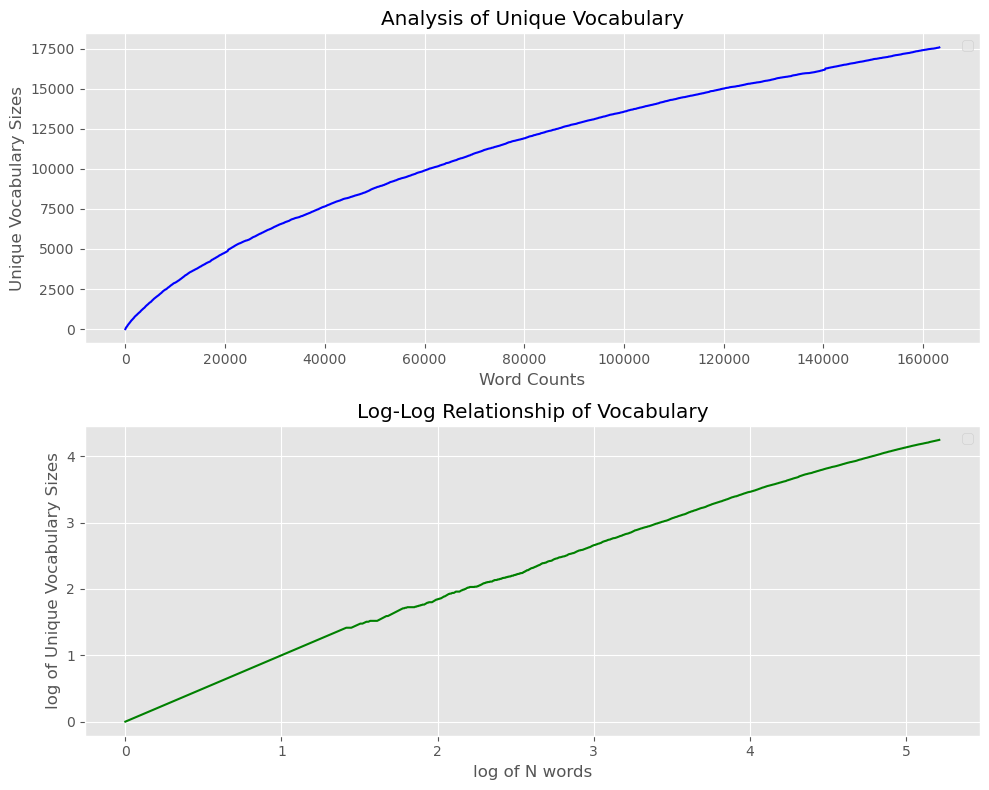

Herdan's Law coefficients:
Beta (slope): 0.6827595953623673
K (intercept): 5.232007280942396


In [17]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

# Tokenize the descriptions
description_words = nltk.word_tokenize(' '.join(show_df.description.str.lower()))

unique_vocab = set()
word_counts = []
vocab_sizes = []
log_word_counts = []
log_vocab_sizes = []

for i, word in enumerate(description_words):
    unique_vocab.update([word])
    vocab_sizes.append(len(unique_vocab))
    word_counts.append(i + 1)
    log_word_counts.append(math.log10(i + 1))
    log_vocab_sizes.append(math.log10(len(unique_vocab)))

# Fit Herdan's coefficient
herdans_data = pd.Series(data=vocab_sizes, index=word_counts)
log_data = pd.Series(data=log_vocab_sizes, index=log_word_counts)
beta, log_k = np.polyfit(log_word_counts, log_vocab_sizes, 1)
k = 10 ** log_k

# Custom plot style
plt.style.use('ggplot')

# Create the plot
fig, axes = plt.subplots(nrows=2, figsize=(10, 8))

# Herdan's Law scatter plot
herdans_data.plot(ax=axes[0], color='blue')
axes[0].set_xlabel('Word Counts')
axes[0].set_ylabel('Unique Vocabulary Sizes')
axes[0].set_title("Analysis of Unique Vocabulary")
axes[0].legend()

# Log-Log Plot
log_data.plot(ax=axes[1], color='green')
axes[1].set_xlabel('log of N words')
axes[1].set_ylabel('log of Unique Vocabulary Sizes')
axes[1].set_title("Log-Log Relationship of Vocabulary")
axes[1].legend()

fig.tight_layout()
plt.show()

# Print the values of k and beta
print("Herdan's Law coefficients:")
print("Beta (slope):", beta)
print("K (intercept):", k)


### 2.2
Calculate the current ratio of distinct vocabulary items to documents, and compare it
to theoretical prediction from the formula:

$$
    \frac{C}{V} = \frac{ N^{1 - \beta}}{k L}
$$

Where

- $C$ is the number of *documents* in the corpus.
- $L$ is the average length of a document in the corpus
- $V$ is the number of distinct vocabulary items
- $N$ the number of words in the corpus
- $k$ and $beta$ are the values you derived in the previous exercise.

In [18]:
# Calculate the current ratio of distinct vocabulary items to documents
num_docs = num_show
corpus = all_words
vocabulary = set(all_words)
avg_doc_words = average_doc_length
avg_word_appearance = appearance_count

# Calculate the theoretical prediction
C_V_ratio = num_docs / len(vocabulary)
Herdan_ratio = len(corpus) ** (1 - beta) / (k * avg_doc_words)

# Print the results
print(f'For {num_docs} shows:')
print("C/V ratio:\t", C_V_ratio)
print("Herdan's Law (RHS):\t", Herdan_ratio)


For 2000 shows:
C/V ratio:	 0.11384335154826958
Herdan's Law (RHS):	 0.10550264987200123


### 2.3 

Based on  ansourwer to 2.2, we can reasonably expect that one of the
best ways to improve our classifier will be to add more documents.

If current trends continue, TVmaze will have information for a million
shows in should happen in 2045.

What would you expect we expect from the following:

- $C/V$

- The total vocabulary size (using Herdan's Law)


In [19]:
# Number of words in the corpus when the number of documents reaches 1 million
N_million = (len(corpus)/num_show) * 1000000

# Predicted vocabulary size based on Herdan's Law
V_predicted = k * N_million ** beta
print('Vocabulary size:', V_predicted)

# C/V ratio
C_V_ratio = 1000000 / V_predicted
print('C/V ratio:', C_V_ratio)


Vocabulary size: 1319818.7562549848
C/V ratio: 0.7576797914567621


### 2.4 

We should exclude happax legomena from the vocabulary, since they cannot be useful to the classifier.

How many words of vocabulary remain?

In [20]:
from collections import Counter

# Count the occurrences of each word in the corpus
word_counts = Counter(corpus)

# Filter out words that appear only once
tuned_corpus = {word for word, count in word_counts.items() if count > 1}

# Calculate the size of the tuned vocabulary
tuned_vocab_size = len(tuned_corpus)

print("Tuned Corpus Size (happax legomena excluded):\t", tuned_vocab_size)


Tuned Corpus Size (happax legomena excluded):	 8053


### 2.5

Chollet's heuristic:

> It turns out that when approaching a new text-classification task, you should pay close attention to the ratio between the number of samples in your training data and the mean number of words per sample (see figure 11.11). If that ratio is small—less than 1,500—then the bag-of-bigrams model will perform better (and as a bonus, it will be much faster to train and to iterate on too). If that ratio is higher than 1,500, then you should go with a sequence model.

Calculate this ratio.

In [21]:
average_num_words = len(corpus)/num_docs
print("Chollet's Heuristic:\t", num_docs/average_num_words)

Chollet's Heuristic:	 24.504548656844424


## Task 3  - Information retrieval

In this task we are going to create a naive search engine that will let you find a "similar"
TV show.

Here is a randomly-selected show for us to use in this section. We will also use the data
in `show_df`.

In [22]:
selected_show = show_df[show_df.in_genre == 1.0].sample(n=1, random_state=random_state_key)
selected_show.T

,1518
tvmaze_id,51056
showname,Children of the North
description,<p>When two MI6 officers are shot dead in an u...
in_genre,1.0


In [23]:
selected_show.iloc[0].description

'<p>When two MI6 officers are shot dead in an unmarked car, assassination attempts, money laundering operations and peace talks follow as hitman Martin Deeley is simultaneously chased by members of the IRA, the RUC and the army.</p>'

### 3.1 

Vectorise the `description` of each show using TFIDF. 

- Vectorise words and bigrams

- Only include words and bigrams that appear twice

- Only include words and bigrams that appear in less than 50% of the descriptions

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))

# vectorize each show's description
tfidf_matrix = tfidf_vectorizer.fit_transform(show_df.description)
tfidf_matrix

<2000x19042 sparse matrix of type '<class 'numpy.float64'>'
	with 134114 stored elements in Compressed Sparse Row format>

### 3.2 

Writing code that shows the size of this new vocabulary (the total number of words and bigrams).

In [25]:
# print vocabulary size for all shows
vocab_features = tfidf_vectorizer.get_feature_names_out()
print("Vocabulary size:", len(vocab_features))

Vocabulary size: 19042


### 3.3 

Lets Iterate over the shows that don't have our genre to find the show whose description is most
similar (using cosine similarity) to the show that was chosen for us.

That is, you should end up with a show that:

- Has a very similar description to the show described at the start of Task 3

- Belongs to a diffferent genre.



In [26]:
from sklearn import metrics
from numpy import argmax

vectorized_selected = tfidf_vectorizer.transform(selected_show.description)
cosine_similarities = metrics.pairwise.cosine_similarity(vectorized_selected, tfidf_vectorizer.transform(show_df.description))
cosine_similarities = cosine_similarities[0]

weighted_similarities = cosine_similarities * (1 - show_df.in_genre)
max_val = weighted_similarities.max()

# find max val index in numpy array
max_idx = np.where(weighted_similarities == max_val)[0][0]

print("Most similar show:", show_df.iloc[max_idx].description)


Most similar show: <p>The story of Dr. Martin Luther King Jr., stretching from his days as a Southern Baptist minister up to his assassination in Memphis in 1968.</p>


## Task 4 - detect genres

In this task, we'll be building a naively simple model for identifying TV genres.

### 4.1 

Using an sklearn function to break our dataset into a training set, and a test set. 

Set the random number initializer to your 
`random_state_key` so that this notebook always returns the same results.

In [27]:
from sklearn.model_selection import train_test_split

# Split into train_val and test sets
train_val, test = train_test_split(show_df, test_size=0.2, random_state=random_state_key)

# Split train_val into separate train and val sets
train, val = train_test_split(train_val, test_size=0.1, random_state=random_state_key)

print("Train:", train.shape[0])
print("Val:", val.shape[0])
print("Test:", test.shape[0])


Train: 1440
Val: 160
Test: 400


In [28]:
X_train, y_train = train.description, train.in_genre
X_val, y_val = val.description, val.in_genre
X_test, y_test = test.description, test.in_genre

### 4.2 

Creating a vectorizer for our data, and prepare it on the descriptions in the training data. 

Set `max_tokens` to the value in our answer from 2.4 (plus 1 for the "unknown" token).

(The vectorizer we used in section 3.1 was trained on all data, not just our training data,
so cannot be re-used here without leaking test information into the training data.)

It should use TFIDF weighting. 

In [29]:
import tensorflow as tf

vectorizer = tf.keras.layers.TextVectorization(output_mode='tf-idf', max_tokens=tuned_vocab_size+1) 
vectorizer.adapt(X_train)


### 4.3 

Using the vectorizer to transform the training and test data

In [30]:
# Fit and transform training data
X_train_vectorized = tfidf_vectorizer.fit_transform(X_train)

# Transform validation data
X_val_vectorized = tfidf_vectorizer.transform(X_val)



### 4.4 

We are creating a logistic regression model using Keras, which we will use
to predict the genre of a TV show based on its description.

Creating a model based on the following:

- An input layer with a shape based on the size of the vocabulary from your vectorization.

- An output layer that uses a sigmoid activation function.

Compiling our model (choosing an appropriate loss, and adding 'accuracy' as a metric) and display a summary of it.

In [31]:
from tensorflow import keras

vocabulary_size = len(tfidf_vectorizer.vocabulary_)

# define logistic regression model
inputs = keras.Input(shape=(vocabulary_size,))
output = keras.layers.Dense(1, activation = "sigmoid")(inputs)
model = keras.Model(inputs=inputs, outputs=output)

# compile the model
model.compile(loss='binary_crossentropy', metrics=["accuracy", 
                                                    keras.metrics.Precision(),
                                                    keras.metrics.Recall()])

# summarize the model
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 14266)]           0         
                                                                 
 dense (Dense)               (None, 1)                 14267     
                                                                 
Total params: 14,267
Trainable params: 14,267
Non-trainable params: 0
_________________________________________________________________


### 4.5 

Our job: Fit the model to the training data. The target variable is `in_genre`.
Hold out 10% of the data as validation data. Stop when the loss in the 
validation data stops improving.

In [32]:
# Setup the early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

# Set up the model fit parameters
fit_params = {
    'x': X_train_vectorized.toarray(),
    'y': y_train,
    'validation_data': (X_val_vectorized.toarray(), y_val),
    'callbacks': [early_stopping],
    'verbose': 1,
    'epochs': 500
}


# Fit the model to the training data
history = model.fit(**fit_params)



Epoch 1/500
45/45 [==============================] - 1s 7ms/step - loss: 0.6896 - accuracy: 0.6486 - precision: 0.6449 - recall: 0.6699 - val_loss: 0.6882 - val_accuracy: 0.6562 - val_precision: 0.5856 - val_recall: 0.8784
Epoch 2/500
45/45 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.8354 - precision: 0.7709 - recall: 0.9572 - val_loss: 0.6837 - val_accuracy: 0.7063 - val_precision: 0.6286 - val_recall: 0.8919
Epoch 3/500
45/45 [==============================] - 0s 2ms/step - loss: 0.6657 - accuracy: 0.8507 - precision: 0.7775 - recall: 0.9848 - val_loss: 0.6788 - val_accuracy: 0.7250 - val_precision: 0.6471 - val_recall: 0.8919
Epoch 4/500
45/45 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.8924 - precision: 0.8359 - recall: 0.9779 - val_loss: 0.6741 - val_accuracy: 0.7312 - val_precision: 0.6505 - val_recall: 0.9054
Epoch 5/500
45/45 [==============================] - 0s 2ms/step - loss: 0.6436 - accuracy: 0.9028 - precisi

### 4.6

Plotting the training and validation loss and accuracy and confirming whether our model has begun to overfit.

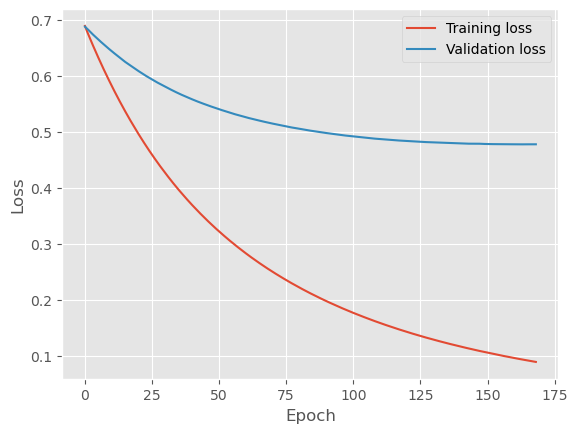

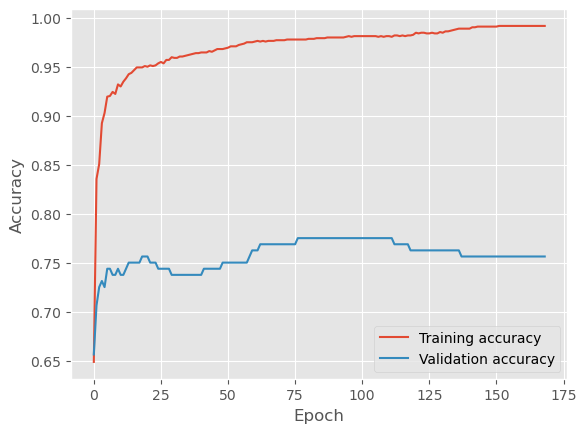

In [33]:
# Plot the training and validation loss (using github copilot)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy (using github copilot)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##### Our analysis: The model trained for 174 epochs and achieved high accuracy, precision, and recall on the training data, suggesting effective learning. However, despite initial increases, the performance metrics on the validation data plateaued early and did not match those on the training data. Further, the validation loss started to increase while training loss decreased, indicating potential overfitting. Therefore, despite good training performance, the model might not generalize well to new, unseen data.
##### Note: The kernel has been run several times (had to restart), so the results reported (epochs) vary slightly

### 4.7 

Reporting the accuracy of our model on the test data. It should be quite close to the
validation accuracy?

In [35]:
# Transform test data
X_test_vectorized = tfidf_vectorizer.transform(X_test)
X_test_tensor = tf.convert_to_tensor(X_test_vectorized.toarray())

# Evaluate the model on the test data
test_evaluation = model.evaluate(X_test_tensor, y_test, return_dict=True)

print("Test Accuracy:", test_evaluation['accuracy'])




13/13 [==============================] - 0s 1ms/step - loss: 0.4784 - accuracy: 0.7650 - precision: 0.7647 - recall: 0.7723
Test Accuracy: 0.7649999856948853


### 4.8 

Extracting the weights from the logistic regression layer, and matching them up with the words in the
vocabulary.

Then we identify any vocabulary that is strongly associated with being in-genre or with being out-of-genre.

In [36]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# instantiate the vectorizer
tfidf_vectorizer = TfidfVectorizer()

# fit and transform the text data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# fit the logistic regression model
model = LogisticRegression().fit(X_train_tfidf, y_train)

# Getting the weights
weights = model.coef_[0]

# get the vocabulary
vocabulary = tfidf_vectorizer.get_feature_names_out()

weights_df = pd.DataFrame({'word': vocabulary, 'weight': weights})

# sort the dataframe by weight
weights_df_top = weights_df.sort_values(by='weight', ascending=False)
weights_df_bot = weights_df.sort_values(by='weight', ascending=True)

print('highest weights:')
print(weights_df_top.head(10))
print()
print('lowest weights:')
print(weights_df_bot.head(10))


highest weights:
             word    weight
11453    thriller  3.093328
12450        when  2.006434
7521       murder  1.907761
7558   mysterious  1.721857
5922           is  1.570555
5199          her  1.535461
2703        crime  1.530057
8588       police  1.322980
5272          his  1.304711
1865         case  1.242788

lowest weights:
              word    weight
10262         show -1.590217
653            and -1.574036
7536         music -1.172068
5404           how -0.896615
3355   documentary -0.877970
2311        comedy -0.844139
7451          most -0.841198
6702          look -0.837689
12600        world -0.826955
3838       episode -0.806388


### 4.9 
Now we move on to a fun part..... a description of a new show to pitch to someone at Macquarie's Film and Television School that is going to be strongly associated with our genre. 

We also try to find a way to confirm that our model does correctly predict the genre.

In [ ]:
# generated fusing GPT-3

prompt = """"Shadows of Deception" is a gripping thriller TV show that follows a brilliant detective as she unravels a web of lies and deceit in a small town. The show delves into the dark secrets of its characters, pushing the boundaries of trust and loyalty. With heart-pounding suspense and unexpected twists, viewers are taken on a thrilling rollercoaster ride, questioning the motives of every character and eagerly anticipating the next shocking revelation. Brace yourself for a mind-bending journey into the depths of human darkness."""

transformed = tfidf_vectorizer.transform([prompt])
prompt_array = tf.convert_to_tensor(transformed.toarray())

prediction = model.predict(prompt_array)

print("Prediction:", prediction[0])
print("Probability of being in genre:", round(prediction[0] * 100, 2), "%")


Prediction: 1.0
Probability of being in genre: 100.0 %


## Task 5 - embeddings

### Task 5.1 (2 marks)

We now create a new model with an embedding layer, compile it, fit it and evaluate its performance on the training data
set.

--- based on our answers to 2.3 we would expect an embedding layer to make it much worse, and based on 2.5 we would
expect a sequence-to-sequence model to perform poorly as well!

In [37]:
# Our initial code did not really work as intended and I was having troubles with implementing the right logic. 

#------previous code not implemented------------------------


# dimension = tuned_vocab_size + 1
# model_embedding = tf.keras.Sequential([
#     tf.keras.layers.Input(shape=(dimension,)),
#     tf.keras.layers.Embedding(input_dim=dimension, output_dim=32),
#     tf.keras.layers.GlobalAveragePooling1D(),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# model_embedding.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])




# X_train_embedding = tf.convert_to_tensor(X_train_matrix.toarray())
# y_train_embedding = np.array(y_train).reshape(-1, 1)


# history_embedded = model_embedding.fit(X_train_embedding, y_train_embedding, epochs=100, validation_split=0.1, verbose=0)





# plt.plot(history_embedded.history['loss'], label='Training loss')
# plt.plot(history_embedded.history['val_loss'], label='Validation loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()



# plt.plot(history_embedded.history['accuracy'], label='Training accuracy')
# plt.plot(history_embedded.history['val_accuracy'], label='Validation accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()


# X_test_embedded = tf.convert_to_tensor(X_test_matrix.toarray())
# y_test_embedded = np.array(y_test).reshape(-1, 1)

# test_eval_embedded = model_embedding.evaluate(X_test_embedded, y_test_embedded)
# print(f'Testing accuracy: {test_eval_embedded[1]}')

In [39]:
# Libraries Import
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Configure Tokenizer
vocab_size = tuned_vocab_size + 1
token_processor = Tokenizer(num_words=vocab_size, oov_token="[UNK]") 
token_processor.fit_on_texts(X_train)



In [40]:
# Convert text data to sequences
sequences_train = token_processor.texts_to_sequences(X_train)
sequences_val = token_processor.texts_to_sequences(X_val)
sequences_test = token_processor.texts_to_sequences(X_test)

In [41]:
# Adjust sequences via padding
sequence_length = 250
x_train_seq = pad_sequences(sequences_train, maxlen=sequence_length, truncating='post')
x_val_seq = pad_sequences(sequences_val, maxlen=sequence_length, truncating='post')
x_test_seq = pad_sequences(sequences_test, maxlen=sequence_length, truncating='post')

In [49]:
# Define and compile model
embedding_size = 128
model_seq = Sequential()
model_seq.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=sequence_length))
model_seq.add(GlobalAveragePooling1D())
model_seq.add(Dense(32, activation='relu'))
model_seq.add(Dense(1, activation='sigmoid'))

model_seq.compile(loss='binary_crossentropy', metrics=['accuracy'])
model_seq.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 250, 128)          1030912   
                                                                 
 global_average_pooling1d_5   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_11 (Dense)            (None, 32)                4128      
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,035,073
Trainable params: 1,035,073
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Fit model to the training data
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights = True)
history_seq = model_seq.fit(
    x_train_seq,  
    y_train,  
    epochs=500,  
    validation_data=(x_val_seq, y_val),  
    callbacks=[early_stopping_callback]
)


Epoch 1/500
45/45 [==============================] - 1s 9ms/step - loss: 0.6930 - accuracy: 0.5021 - val_loss: 0.6912 - val_accuracy: 0.5375
Epoch 2/500
45/45 [==============================] - 0s 5ms/step - loss: 0.6889 - accuracy: 0.5951 - val_loss: 0.6880 - val_accuracy: 0.6875
Epoch 3/500
45/45 [==============================] - 0s 5ms/step - loss: 0.6792 - accuracy: 0.6611 - val_loss: 0.6797 - val_accuracy: 0.6562
Epoch 4/500
45/45 [==============================] - 0s 5ms/step - loss: 0.6585 - accuracy: 0.7500 - val_loss: 0.6644 - val_accuracy: 0.6187
Epoch 5/500
45/45 [==============================] - 0s 6ms/step - loss: 0.6263 - accuracy: 0.8021 - val_loss: 0.6482 - val_accuracy: 0.7125
Epoch 6/500
45/45 [==============================] - 0s 5ms/step - loss: 0.5835 - accuracy: 0.8188 - val_loss: 0.6255 - val_accuracy: 0.6375
Epoch 7/500
45/45 [==============================] - 0s 5ms/step - loss: 0.5311 - accuracy: 0.8486 - val_loss: 0.6037 - val_accuracy: 0.6438
Epoch 8/500
4

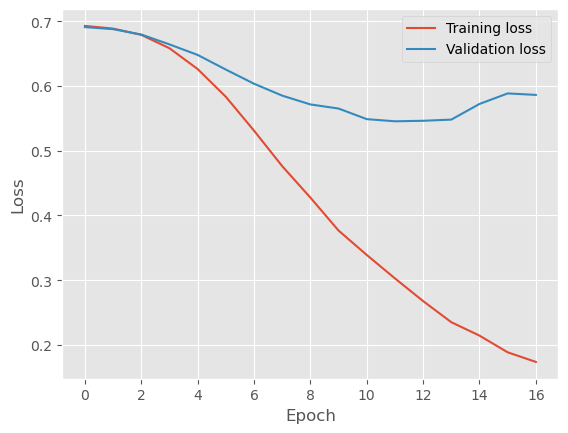

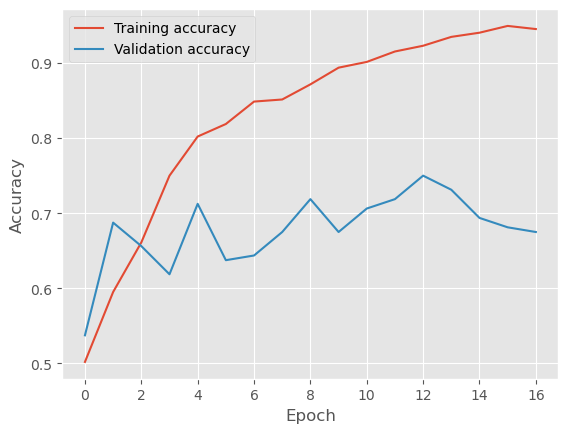

In [52]:
# Plot Training and Validation Loss
plt.plot(history_seq.history['loss'], label='Training loss')
plt.plot(history_seq.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Training and Validation Accuracy
plt.plot(history_seq.history['accuracy'], label='Training accuracy')
plt.plot(history_seq.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [51]:
# Evaluate Model on Test Data
evaluation = model_seq.evaluate(x_test_seq, y_test, return_dict = True)
print("Test Loss:", evaluation['loss'])
print("Test Accuracy:", evaluation['accuracy'])

13/13 [==============================] - 0s 1ms/step - loss: 0.4966 - accuracy: 0.7600
Test Loss: 0.49659407138824463
Test Accuracy: 0.7599999904632568


##### We can see some fluctuations from the graph but it does not indicate any overfitting in our case. There seems to be no significant gap, although there seems to be a little different between the training and validation accuracy, the rate of increase is somewhat similar. 
##### The accuracy in task 5 is 76%, which is roughly the same as the accuracy acheived in task 4, with no significant difference. This little difference does now allow us to make any conclusions about the usefulness of adding embedding layers 